In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
r = requests.get('https://bostonpads.com/average-rent-prices-boston-by-town/')
soup = BeautifulSoup(r.text, 'html.parser')
table_1bed=soup.find('table', attrs={'class':'table table-striped table-borderless table-hover'})


In [3]:
table_1bed.text

'\n\n\n#\nCity/Neighborhood\nAverage Rent\n\n\n\n\n1\nBack Bay\n$2,444\n\n\n2\nBeacon Hill\n$2,433\n\n\n3\nSouth End\n$2,362\n\n\n4\nSymphony\n$2,356\n\n\n5\nFenway\n$2,324\n\n\n6\nNorth End \n$2,247\n\n\n7\nCambridge\n$2,143\n\n\n8\nBrookline\n$2,100\n\n\n9\nRoxbury\n$1,975\n\n\n10\nSomerville\n$1,972\n\n\n11\nSouth Boston\n$1,952\n\n\n12\nCharlestown\n$1,921\n\n\n13\nMission Hill\n$1,899\n\n\n14\nBrighton\n$1,847\n\n\n15\nNewton\n$1,840\n\n\n16\nAllston\n$1,756\n\n\n17\nJamaica Plain\n$1,708\n\n\n18\nEast Boston\n$1,618\n\n\n19\nMedford\n$1,546\n\n\n20\nMalden\n$1,543\n\n\n21\nDorchester\n$1,356\n\n\n22\nQuincy\n$1,299\n\n\n'

In [4]:
headers=table_1bed.findAll('th')
for i, head in enumerate(headers): headers[i]=str(headers[i]).replace("<th>","").replace("</th>","").replace("\n","")

In [5]:
headers[1]=headers[1].replace('City/Neighborhood','Neighborhood')

In [6]:
headers

['#', 'Neighborhood', 'Average Rent']

In [7]:
rows= table_1bed.findAll('tr')
rows=rows[1:len(rows)]
for i, row in enumerate(rows): rows[i] = str(rows[i]).replace("\n</td></tr>","").replace("<tr>\n<td>","").replace("</td>\n</tr>","")

In [8]:
rows

['1</td>\n<td>Back Bay</td>\n<td>$2,444',
 '2</td>\n<td>Beacon Hill</td>\n<td>$2,433',
 '3</td>\n<td>South End</td>\n<td>$2,362',
 '4</td>\n<td>Symphony</td>\n<td>$2,356',
 '5</td>\n<td>Fenway</td>\n<td>$2,324',
 '<tr>\n<td class="number">6</td>\n<td class="town">North End </td>\n<td class="data">$2,247',
 '7</td>\n<td>Cambridge</td>\n<td>$2,143',
 '8</td>\n<td>Brookline</td>\n<td>$2,100',
 '9</td>\n<td>Roxbury</td>\n<td>$1,975',
 '10</td>\n<td>Somerville</td>\n<td>$1,972',
 '11</td>\n<td>South Boston</td>\n<td>$1,952',
 '12</td>\n<td>Charlestown</td>\n<td>$1,921',
 '13</td>\n<td>Mission Hill</td>\n<td>$1,899',
 '14</td>\n<td>Brighton</td>\n<td>$1,847',
 '15</td>\n<td>Newton</td>\n<td>$1,840',
 '16</td>\n<td>Allston</td>\n<td>$1,756',
 '17</td>\n<td>Jamaica Plain</td>\n<td>$1,708',
 '18</td>\n<td>East Boston</td>\n<td>$1,618',
 '19</td>\n<td>Medford</td>\n<td>$1,546',
 '20</td>\n<td>Malden</td>\n<td>$1,543',
 '21</td>\n<td>Dorchester</td>\n<td>$1,356',
 '22</td>\n<td>Quincy</td>\n<td>$

In [9]:
df=pd.DataFrame(rows)
    

In [10]:
df.head()

,0
0,"1</td>\n<td>Back Bay</td>\n<td>$2,444"
1,"2</td>\n<td>Beacon Hill</td>\n<td>$2,433"
2,"3</td>\n<td>South End</td>\n<td>$2,362"
3,"4</td>\n<td>Symphony</td>\n<td>$2,356"
4,"5</td>\n<td>Fenway</td>\n<td>$2,324"


In [11]:
df=df[0].str.split("</td>\n<td>", n = 2, expand = True)

In [12]:
df.columns=[headers[0],headers[1],headers[2]]

In [13]:
df.head()

,#,Neighborhood,Average Rent
0,1,Back Bay,"$2,444"
1,2,Beacon Hill,"$2,433"
2,3,South End,"$2,362"
3,4,Symphony,"$2,356"
4,5,Fenway,"$2,324"


In [14]:
address = 'Boston, MA, US'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_B = location.latitude
longitude_B = location.longitude
print('The geograpical coordinate of Boston, MA, US are {}, {}.'.format(latitude_B, longitude_B))

The geograpical coordinate of Boston, MA, US are 42.3602534, -71.0582912.


In [15]:
df

,#,Neighborhood,Average Rent
0,1,Back Bay,"$2,444"
1,2,Beacon Hill,"$2,433"
2,3,South End,"$2,362"
3,4,Symphony,"$2,356"
4,5,Fenway,"$2,324"
5,"<tr>\n<td class=""number"">6</td>\n<td class=""to...",None,None
6,7,Cambridge,"$2,143"
7,8,Brookline,"$2,100"
8,9,Roxbury,"$1,975"
9,10,Somerville,"$1,972"


In [16]:
df['Neighborhood'][5]=str('North End')

In [17]:
df['Average Rent'][5]=str('$2,247')
df.shape

(22, 3)

In [18]:
df.drop('#',axis=1,inplace=True)
Rent=df['Average Rent']

for i in range(22):
     Rent[i]=Rent[i].replace('$','').replace(',','')
        
df['Rent']=Rent
df['Rent'].astype('int32')
df.drop('Average Rent',axis=1,inplace=True)
df.head()

,Neighborhood,Rent
0,Back Bay,2444
1,Beacon Hill,2433
2,South End,2362
3,Symphony,2356
4,Fenway,2324


In [19]:
for city in df['Neighborhood']:
    address=city+',MA, US'
    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(address)
    df['latitude'] = location.latitude
    df['longitude'] = location.longitude

In [20]:
i=0
for city in df['Neighborhood']:
    address=city+',MA, US'
    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(address)
    df['latitude'][i] = location.latitude
    df['longitude'][i] = location.longitude
    i=i+1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
df.head()

,Neighborhood,Rent,latitude,longitude
0,Back Bay,2444,42.350707,-71.079730
1,Beacon Hill,2433,42.358708,-71.067829
2,South End,2362,42.341310,-71.077230
3,Symphony,2356,42.342690,-71.084861
4,Fenway,2324,42.345365,-71.104282


In [22]:
#set color 
colors_array = cm.rainbow(np.linspace(0, 1, 22))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# create map of New York using latitude and longitude values
map_Boston = folium.Map(location=[latitude_B, longitude_B], zoom_start=10)

# add markers to map
for lat, lng, AR, neighborhood in zip(df['latitude'], df['longitude'], df['Rent'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, AR)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
    
map_Boston

## The popup label can show the name of the neighborhood with its average rent.

In [23]:
CLIENT_ID = '4GHARO0J2DGYJ535PAMQRL5US30P405QBB54WRQ1ZP4SDH3G' # your Foursquare ID
CLIENT_SECRET = 'SPKTFB4M4YC0ERHNEAZ3LSJKD0IXEY0FUVG5VJDHILPLFEZJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4GHARO0J2DGYJ535PAMQRL5US30P405QBB54WRQ1ZP4SDH3G
CLIENT_SECRET:SPKTFB4M4YC0ERHNEAZ3LSJKD0IXEY0FUVG5VJDHILPLFEZJ


In [24]:
neighborhood_latitude = df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Back Bay are 42.3507067, -71.0797297.


In [25]:
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4GHARO0J2DGYJ535PAMQRL5US30P405QBB54WRQ1ZP4SDH3G&client_secret=SPKTFB4M4YC0ERHNEAZ3LSJKD0IXEY0FUVG5VJDHILPLFEZJ&v=20180605&ll=42.3507067,-71.0797297&radius=500&limit=200'

In [26]:
results = requests.get(url).json()

In [27]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Gre.Co,Greek Restaurant,42.349920,-71.081633
1,sweetgreen,Salad Place,42.349933,-71.078625
2,The Lenox Hotel,Hotel,42.349229,-71.079528
3,Commonwealth Avenue Mall,Park,42.351887,-71.080033
4,Saltie Girl Seafood Bar,Seafood Restaurant,42.351111,-71.077811


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [30]:
nearby_venues['name'].count()

100

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
df_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )


Back Bay
Beacon Hill
South End
Symphony
Fenway
North End
Cambridge
Brookline
Roxbury
Somerville
South Boston
Charlestown
Mission Hill
Brighton
Newton
Allston
Jamaica Plain
East Boston
Medford
Malden
Dorchester
Quincy


In [33]:
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Back Bay,42.350707,-71.07973,Gre.Co,42.349920,-71.081633,Greek Restaurant
1,Back Bay,42.350707,-71.07973,sweetgreen,42.349933,-71.078625,Salad Place
2,Back Bay,42.350707,-71.07973,The Lenox Hotel,42.349229,-71.079528,Hotel
3,Back Bay,42.350707,-71.07973,Commonwealth Avenue Mall,42.351887,-71.080033,Park
4,Back Bay,42.350707,-71.07973,Saltie Girl Seafood Bar,42.351111,-71.077811,Seafood Restaurant


In [34]:
Count=df_venues.groupby('Neighborhood').count()

In [35]:
df_sort=df.sort_values('Neighborhood').reset_index(drop=True)

In [36]:
Count_Venue=pd.DataFrame(Count['Venue'].reset_index(drop=True))

In [37]:
df_sort['Venue_number']=Count_Venue

In [38]:
df_sort

,Neighborhood,Rent,latitude,longitude,Venue_number
0,Allston,1756,42.355434,-71.132127,80
1,Back Bay,2444,42.350707,-71.079730,100
2,Beacon Hill,2433,42.358708,-71.067829,54
3,Brighton,1847,42.350097,-71.156442,47
4,Brookline,2100,42.331764,-71.121163,59
5,Cambridge,2143,42.375100,-71.105616,37
6,Charlestown,1921,42.377875,-71.061996,34
7,Dorchester,1356,42.297320,-71.074495,12
8,East Boston,1618,42.375097,-71.039217,35
9,Fenway,2324,42.345365,-71.104282,55


In [39]:
df_sort['Rent']=df_sort['Rent'].astype('int64')
df_sort['Rent'].dtype

dtype('int64')

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline 
lm = LinearRegression()
X = df_sort[['Venue_number']]
Y = df_sort['Rent']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm.intercept_

1662.038820773288

In [42]:
lm.coef_

array([6.23194456])

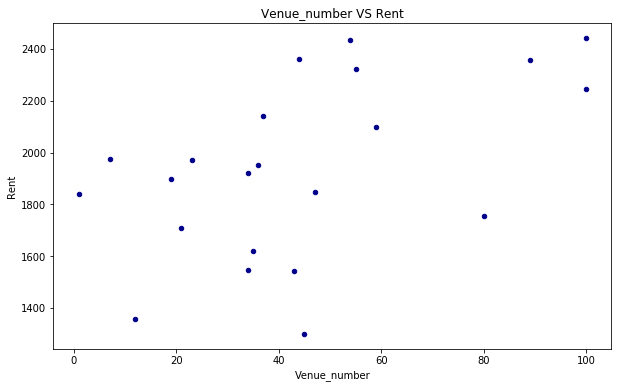

In [43]:
df_sort.plot(kind='scatter', x='Venue_number', y='Rent', figsize=(10, 6), color='darkblue')

plt.title('Venue_number VS Rent')
plt.xlabel('Venue_number')
plt.ylabel('Rent')

plt.show()

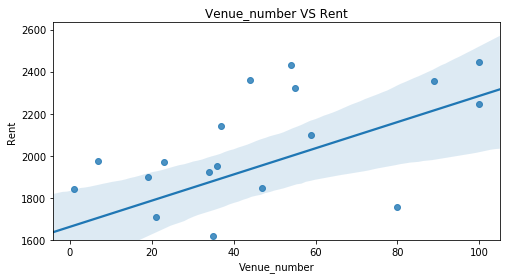

In [61]:
width = 8
height =4
plt.figure(figsize=(width, height))
sns.regplot(x="Venue_number", y="Rent", data=df_sort)
plt.ylim(1600,)
plt.title('Venue_number VS Rent')
plt.xlabel('Venue_number')
plt.ylabel('Rent')
plt.show()

In [45]:
# Calculate R score
lm.score(X, Y)

0.25954517309302416

## The linear regression between the number of venues and Rent shows a very weak linear relationship with a R-score of 0.26

In [46]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cemetery,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Back Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Back Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
df_onehot.shape

(975, 213)

In [48]:

df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cemetery,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Record Shop,Resort,Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Allston,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.025000,0.000000,0.012500,0.000000,0.000000,0.037500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0125,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.0125,0.000000,0.0125,0.00000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.037500,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.025,0.000000,0.000000,0.000000,0.012500,0.000000,0.025000,0.000000,0.000000,0.012500,0.000000,0.0125,0.0125,0.000000,0.0125,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.0125,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.025000,0.012500,0.000000,0.000000,0.000000,0.000000,0.0125,0.012500,0.000000,0.000000,0.000000,0.012500,0.012500,0.000000,0.025000,0.012500,0.000000,0.000000,0.00,0.000000,0.0000

In [49]:
df_grouped.shape

(22, 213)

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Korean Restaurant,Chinese Restaurant,Pizza Place,Bakery,Thai Restaurant,Thrift / Vintage Store,Pharmacy,Dive Bar,Sandwich Place,Bubble Tea Shop
1,Back Bay,American Restaurant,Coffee Shop,Italian Restaurant,Hotel,Sporting Goods Shop,Seafood Restaurant,Gym / Fitness Center,Clothing Store,Spa,Ice Cream Shop
2,Beacon Hill,Hotel Bar,Italian Restaurant,American Restaurant,Pizza Place,Restaurant,Plaza,Playground,Coffee Shop,French Restaurant,Gift Shop
3,Brighton,Pizza Place,Bus Station,Bank,Bakery,Deli / Bodega,Chinese Restaurant,Pub,Coffee Shop,Grocery Store,Salon / Barbershop
4,Brookline,Pizza Place,Gym,Italian Restaurant,Coffee Shop,Donut Shop,Chinese Restaurant,Arts & Crafts Store,Playground,Café,Sandwich Place


In [52]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 4, 1, 1], dtype=int32)

In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head() # check the last columns!

,Neighborhood,Rent,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Back Bay,2444,42.350707,-71.079730,1,American Restaurant,Coffee Shop,Italian Restaurant,Hotel,Sporting Goods Shop,Seafood Restaurant,Gym / Fitness Center,Clothing Store,Spa,Ice Cream Shop
1,Beacon Hill,2433,42.358708,-71.067829,1,Hotel Bar,Italian Restaurant,American Restaurant,Pizza Place,Restaurant,Plaza,Playground,Coffee Shop,French Restaurant,Gift Shop
2,South End,2362,42.341310,-71.077230,1,Italian Restaurant,Coffee Shop,Bar,Wine Shop,Wine Bar,Gift Shop,Park,Bakery,French Restaurant,Latin American Restaurant
3,Symphony,2356,42.342690,-71.084861,1,Coffee Shop,Pizza Place,Bakery,Sushi Restaurant,Middle Eastern Restaurant,Concert Hall,Bookstore,Vietnamese Restaurant,American Restaurant,Donut Shop
4,Fenway,2324,42.345365,-71.104282,1,Mexican Restaurant,American Restaurant,Furniture / Home Store,Thai Restaurant,Chinese Restaurant,Café,Bakery,Greek Restaurant,Salad Place,Sandwich Place


In [54]:
# create map
map_clusters = folium.Map(location=[latitude_B, longitude_B], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rent in zip(df_merged['latitude'], df_merged['longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels'],df_merged['Rent']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+' $'+str(rent), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## In this map, each popup label will show the name, the cluster label and the average rent of its corresponding neighborhood. 

## Examine Cluster

In [55]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,1975,Gym,Plaza,Metro Station,Art Gallery,Furniture / Home Store,Park,Women's Store,Dive Bar,Falafel Restaurant,Ethiopian Restaurant


In [56]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2444,American Restaurant,Coffee Shop,Italian Restaurant,Hotel,Sporting Goods Shop,Seafood Restaurant,Gym / Fitness Center,Clothing Store,Spa,Ice Cream Shop
1,2433,Hotel Bar,Italian Restaurant,American Restaurant,Pizza Place,Restaurant,Plaza,Playground,Coffee Shop,French Restaurant,Gift Shop
2,2362,Italian Restaurant,Coffee Shop,Bar,Wine Shop,Wine Bar,Gift Shop,Park,Bakery,French Restaurant,Latin American Restaurant
3,2356,Coffee Shop,Pizza Place,Bakery,Sushi Restaurant,Middle Eastern Restaurant,Concert Hall,Bookstore,Vietnamese Restaurant,American Restaurant,Donut Shop
4,2324,Mexican Restaurant,American Restaurant,Furniture / Home Store,Thai Restaurant,Chinese Restaurant,Café,Bakery,Greek Restaurant,Salad Place,Sandwich Place
6,2143,Park,Pub,Coffee Shop,Spa,Pharmacy,Indian Restaurant,Pizza Place,Grocery Store,Knitting Store,Bed & Breakfast
7,2100,Pizza Place,Gym,Italian Restaurant,Coffee Shop,Donut Shop,Chinese Restaurant,Arts & Crafts Store,Playground,Café,Sandwich Place
9,1972,Convenience Store,Music Venue,General Entertainment,Pizza Place,Park,New American Restaurant,Dog Run,Donut Shop,Bus Stop,Meze Restaurant
10,1952,Pizza Place,Liquor Store,Sandwich Place,Bar,Coffee Shop,Sports Bar,Italian Restaurant,Mexican Restaurant,Dog Run,Dessert Shop
11,1921,Pizza Place,Coffee Shop,Gastropub,Pub,Donut Shop,Convenience Store,National Park,Plaza,Pharmacy,Pet Store


In [57]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,1840,Lawyer,Dive Bar,Flower Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Dumpling Restaurant,Dry Cleaner


In [58]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,2247,Italian Restaurant,Pizza Place,Bakery,Park,Seafood Restaurant,Coffee Shop,Café,Grocery Store,Sandwich Place,Resort


In [59]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,1356,Plaza,Gym,Café,Shoe Store,Donut Shop,Southern / Soul Food Restaurant,Breakfast Spot,Market,Fried Chicken Joint,Pizza Place
